<a href="https://colab.research.google.com/github/SrMouraSilva/Aprendizagem-probabilistica/blob/main/Trabalho_5_2_Infer%C3%AAncia_Variacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esta é a parte referente ao item **5.2 - Inferência Variacional.ipynb**:

* **Por favor**, veja esse arquivo online em: https://colab.research.google.com/drive/13I_ttK224N7y7kguzunbaGhbhXALzxvW?usp=sharing
* Caso queira ver a parte referente ao item **5.1 - PCA Probabilístico**, acesse https://colab.research.google.com/drive/1luBRh4dewKW1q3UzkcvlPT3N4XjeR3_X?usp=sharing

In [ ]:
# Programação simbólica
import sympy as sp
from sympy.plotting import plot, plot3d

# Exibir símbolos nas células
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_style("dark")

np.random.seed(42)

In [ ]:
# Ajustes nas configurações padrões dos plots
mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Item 2. Considere  os  dados  unidimensionais  disponibilizados  no  arquivo `gaussian1d.csv`.   Implemente e execute um procedimento de inferência variacional para aproximar a posteriori dos parâmetros $μ, τ$ de uma Gaussiana univariada $\mathcal{N}(x|μ,τ−1)$ a partir desses dados.

* O arquivo possui $500$ valores. Faça experimentos considerando somente os primeiros $10, 50, 100$ pontos e, finalmente, todos os pontos.
* Indique o valor esperado da posteriori aproximada para os parâmetros $μ,τ$.
* Ilustre a aproximação obtida plotando as distribuições variacionais obtidas para $μ,τ$.

### Organização do trabalho

O trabalho está organizado da seguinte forma:

**Conjunto de dados: `gaussiana_1d.csv`**

Contém os códigos refentes ao carregamento do conjunto de dados disponibilizado pelo docente.

**`InferenciaVariacional`: Implementação do algorimo de Inferência Variacional**

Implementação referente ao algoritmo solicitado.

**Treinamento**

Contém informações relevantes referentes aos treinamentos realizados, incluindo as prioris selecionadas. O fim da seção contém um resumo do resultado do treinamento. 

**Gráficos**

São apresentados os gráficos solicitados na questão, além de outros adicionais.


### Conjunto de dados: `gaussiana_1d.csv`

O código abaixo carrega o conjunto de dados `gaussiana_1d.csv`. O código está condensado. Caso queira ver, basta clicar no botão `Mostrar Código` abaixo.

**Obs**: Adicionei uma linha cabeçalho

In [ ]:
#@markdown
import csv
from io import StringIO

gaussiana_1d = """x1
1.232343238542530584e+00
2.705229728464779271e+00
2.200096014902547914e+00
9.348887933230665137e-01
1.590867838236802889e+00
3.167741974080624967e+00
2.840786512321169521e-01
1.696712971599248165e+00
2.895152113080610601e+00
1.387121984029990429e+00
1.519954998534406743e+00
1.933030645825538185e+00
3.054571718023753490e+00
1.548228065630658179e+00
1.686057345609774938e+00
1.692867267593119340e+00
3.559828120318571543e+00
3.546291272517773319e+00
2.709973319866939345e+00
2.273075021658555350e+00
2.521398320250100245e+00
3.054106726037405295e+00
1.338265525588629989e+00
2.831436691081525847e+00
1.113372477035956987e+00
1.549041587903284611e+00
2.641420235199944067e+00
9.897701887198724346e-01
1.900956458122473158e+00
1.390647269416909415e+00
1.819249809695178133e+00
2.109866577392804921e-02
7.473369287046305320e-01
1.505112061417724689e+00
2.655814974792259253e+00
1.877221031243082150e+00
2.002012366429321677e+00
2.486646945987015744e+00
1.378073887558282085e+00
2.200554803993928221e+00
1.430519873735204950e+00
7.783531850581866252e-01
1.723592105071345415e+00
2.405742016391211102e+00
2.239418613997477436e+00
1.991634577129236527e+00
3.691657702619723924e+00
2.291972988588724114e+00
2.692070866789734840e+00
3.582606331919400589e+00
1.084943492558696265e+00
1.265465812347440711e+00
3.232990738822308252e+00
1.435684428098760401e+00
2.020989213435006704e+00
2.756120573211023661e+00
2.629824529329599425e+00
3.240891919489412132e+00
3.057580111538268142e+00
2.756174808500112317e+00
1.453612428273872714e+00
2.562052782508614346e+00
2.222223858452827105e+00
1.062188699622608201e+00
3.002181766733009738e+00
2.570802427622033370e+00
2.032166344490971444e+00
1.835179023037172952e+00
1.152673134678471323e+00
2.141084825423272608e+00
2.331236477933070095e+00
1.412284674424579389e+00
2.821802364240740602e+00
1.224160285493307798e+00
4.987413453454567769e-01
2.735198076553590596e+00
1.714777139157648511e+00
1.910883625595038549e+00
1.407786245933270841e+00
8.644128415636558316e-01
2.887586859666294359e+00
1.512896070172755625e+00
3.174470767598077003e+00
2.570853092977018139e+00
1.777432380022373914e+00
1.232151048456438414e+00
1.482071162228594030e+00
1.142616671657060490e+00
3.475812009669843050e+00
2.116277509002167712e+00
2.813318138893075471e+00
1.103846771994202669e+00
2.128011167771026724e+00
2.832874164233079917e+00
1.763111618466692398e+00
2.729108026083061578e+00
1.233094674763387744e+00
1.035880024845302838e+00
2.268276745586776943e+00
1.731881771847611162e+00
2.454001224676733539e+00
6.014220311948570430e-01
2.503647153740567788e+00
3.837278326555770391e+00
1.982586801536426080e+00
2.024142130876294132e+00
2.126960658146559879e+00
6.833843484944854829e-01
2.301331178704878688e+00
8.648038834233520156e-01
1.697584855991520536e+00
2.878841486655072224e+00
1.480123104698303660e+00
2.354436559586013722e+00
2.716114652624998627e+00
2.197099549539224927e+00
1.030593040138780170e+00
1.764904478222150574e+00
3.385513047336592862e+00
5.680764087714023081e-01
1.804989839438820187e+00
1.609600638702931796e+00
2.085381279256381060e+00
2.529068336702768427e+00
3.137516292321945066e+00
1.808916843114062978e+00
2.574412063064708711e+00
2.353369645265311227e+00
2.335414190962665337e+00
1.601245563944253103e+00
1.294787226405633040e+00
1.222152055468348042e+00
1.465118119692051524e+00
2.227466759211689684e+00
2.538072476020829527e+00
2.228727015822210333e+00
1.611830128913078086e+00
3.277013711353467862e+00
3.074000182180996354e+00
1.749684119733549981e+00
1.417746068985562768e+00
2.092075877096995828e+00
2.896115465706456504e+00
2.235300371957773535e+00
2.393539363302482847e+00
1.850036707384032919e+00
2.322632244055554018e+00
3.092157855468691707e+00
1.830528579378393861e+00
2.101333869452784331e+00
2.179475351745117973e+00
2.200624123060266335e+00
1.001643801448182103e+00
6.728534460350885649e-01
1.278994984879917585e+00
2.118753135926553899e+00
2.391635450782852779e+00
1.624756420180884620e+00
2.973868105575387943e+00
1.898759297650962186e+00
2.014365580118277155e+00
1.862846831827022598e+00
2.094771254011850825e+00
2.498138394926345818e+00
2.470688059867947928e+00
1.364719046321400064e+00
3.077392988596270751e+00
1.225699366374744415e+00
2.056021958916633974e+00
1.805972322127991525e+00
1.258250871559847051e+00
1.946881722836983020e+00
1.476165557308551479e+00
2.051553206118113870e+00
2.285024816579312112e+00
3.040811238228636082e+00
2.217353465421172842e+00
1.567798417037403080e+00
1.723082976193177629e+00
2.098979468051258124e+00
2.066086786288006572e+00
3.032085469311426973e+00
2.986663518779658855e+00
1.746193972542622541e+00
1.612051430714920297e+00
1.918893495993352349e-01
1.611854653408135718e+00
1.308408763636043748e+00
1.749101219550311725e+00
2.276891873171559944e+00
2.125293897550843525e+00
1.978809418998036529e+00
2.141125864154215019e+00
1.910821267320218508e+00
2.139313423223626831e+00
-2.847009064864995942e-01
1.809580747267851564e+00
1.921616703444000374e+00
1.758691526310964148e+00
1.845888720132749183e+00
2.497315353578248409e+00
1.577075664345075401e+00
3.556131377727901111e+00
2.486699426829922732e+00
1.995540100108155857e+00
1.853867683993370319e+00
1.938819504575427732e+00
1.352780163974623306e+00
1.932681638904482968e+00
2.197059004482614597e+00
2.409797806351638094e+00
2.409902573817490179e+00
1.805632222827306510e+00
9.986786365238222718e-01
1.526872995680602862e+00
3.139992633154413681e+00
2.633608909750754457e+00
2.261360515935047832e+00
1.461683677051825114e+00
2.002577513800434250e+00
1.112108157444459788e+00
1.609721692408389693e+00
1.826615054324796539e+00
1.744281951830267019e+00
2.676419712345852187e+00
9.968092855404486752e-01
1.388046972153957226e+00
1.027948813674612660e+00
1.125059152585458300e+00
2.087720765623601427e+00
8.683176461900974363e-01
2.533065725640914589e+00
1.825474890421139307e+00
2.048640696395633842e+00
2.228096198890859192e+00
1.692997909365933529e+00
2.730073408446772376e+00
1.862578940056605070e+00
2.420071105980769577e+00
1.859206283934135673e+00
2.205679251821646147e+00
2.197751370513431279e+00
2.176755439281796711e+00
1.311060312569764852e+00
2.308210713109006385e+00
1.774463350100832226e+00
2.445822361816371693e+00
4.779572889964711635e-01
9.640063841585286841e-01
2.256994821577835264e+00
3.317288728287386412e+00
2.590475702559365878e+00
1.517434316600099420e+00
8.035382629631706575e-01
2.525158463277191956e+00
1.943019057243568160e+00
2.417690958148615898e+00
2.081528508337394445e+00
2.020960713366907413e+00
4.092064115782137357e+00
1.995665462976261795e+00
1.887396632665545582e+00
1.914122818055692177e+00
1.587377230544682494e+00
2.700129684129063179e+00
1.749857911709078673e+00
2.449679399607409547e+00
2.201244732327402698e+00
2.861953169284368492e+00
2.297111842346700961e+00
1.142007393203365195e+00
1.062031492027235124e+00
2.995867373604884421e+00
1.569576463230202723e+00
1.066192960578288496e+00
1.526508147223452516e+00
2.894225116075061610e+00
9.957577577142240344e-01
1.387295365555961002e+00
1.528495888783872658e+00
1.115275155915165239e+00
1.162554107793786873e+00
9.265355561176875643e-01
1.673891252773141991e+00
1.749041558373590544e+00
1.517372642744293065e+00
8.306590440324417290e-01
2.886242347126736441e+00
1.060199347160888372e+00
2.196599523169839863e+00
1.240025253812880424e+00
2.472571388454280594e+00
2.675875540016210419e+00
1.379433481634137593e+00
6.397275624559348728e-01
2.491995931627224881e+00
3.326391286734644570e+00
2.293940428060161629e+00
2.113522049109979761e+00
2.579658286004982592e+00
2.540975469584121349e+00
1.413816374119662100e+00
1.533909638378399665e+00
2.432129606387331222e+00
1.898167185415310376e+00
2.930980744983272768e+00
1.501954891489762023e+00
2.530761362243573842e+00
2.242281640118251040e+00
1.910595141304211486e+00
2.831494480834557681e+00
2.480883192582489460e+00
1.289380910973773053e+00
2.452702970367177215e+00
2.972265199597521335e+00
1.907761675849202421e+00
1.824173762011077837e+00
1.526487960899034491e+00
1.990380600188472737e+00
2.485217158362873935e+00
1.421821200606594005e+00
1.047981438900918771e+00
1.734304689914438313e+00
1.024387111417933482e+00
2.369971307872804189e+00
1.698284770174455005e+00
7.587434520107509961e-01
1.753497262355810271e+00
1.863800637386848091e+00
2.317586837879034967e+00
1.897212452898354496e+00
3.321389149814138797e+00
1.633220989149193336e+00
1.955877563161252830e+00
1.927231206798792673e+00
1.800151552829995394e+00
2.100710096977111085e+00
2.382708320438866156e+00
2.947592880729913656e+00
8.903683509008342156e-01
1.639133093201461611e+00
1.683377788711862832e+00
2.663160305002282513e+00
1.747801130916286860e+00
6.599084865943767308e-01
2.062034805916697522e+00
1.976178115924438261e+00
2.127103551085796518e+00
1.264493773320872538e+00
3.215541080089706405e+00
1.770996550731772645e+00
1.866854014483004365e+00
1.363597837161936166e+00
1.341682169761918564e+00
1.135394404154211223e+00
1.721887229591287038e+00
1.322887388274101017e+00
3.454142002269023681e+00
6.646342316093580838e-01
1.202149817960719069e+00
1.716157135571922732e+00
2.476230249813320405e+00
1.707429703413559929e+00
2.477978299026272424e+00
1.302224278181554284e+00
2.041925162841186747e+00
3.233223279293317987e+00
1.315701375345621704e+00
2.296679148792312830e+00
2.146319852099303205e+00
4.079243433292190080e-01
1.583534932671436302e+00
2.799845182793948339e+00
2.095514338200826110e+00
1.142796395714210433e+00
2.488453293968201585e+00
1.661208916346149866e+00
2.254594311397113415e+00
2.266522768884458028e+00
1.208962754346404100e+00
2.558492759331866484e+00
1.287583694541477586e+00
1.076669959132275700e+00
1.375745636153692386e+00
1.755277390154253325e+00
2.077359713802829244e+00
1.453700803805034969e+00
2.526666786553287913e+00
2.177812029762767665e+00
1.508703470542589464e+00
2.628612920458135882e+00
2.820999309112956155e+00
1.930219381686654634e+00
1.847984031065900368e+00
7.457542478379948214e-01
1.711845082501082915e+00
1.793873626783632602e+00
2.173509442836863759e+00
1.880904528063040315e+00
2.172553102751333842e+00
3.084765646519195048e+00
1.625294147409770407e+00
1.652830169623051848e+00
1.074280328562426723e+00
1.993876125238784214e+00
2.690711083855317654e+00
7.618062817513797658e-01
1.529168023320283787e+00
2.025413773039772991e+00
2.601113513646367004e+00
2.270730142330410928e+00
2.230137538517161566e+00
1.841386907933129313e+00
2.340736554817162585e+00
2.717221154230360369e+00
7.915603258100134543e-01
2.515152322264982310e+00
1.930166271562980151e+00
1.625241280160560686e+00
2.724845448520827329e-01
1.023944218624218250e+00
3.200709028272825662e+00
1.513122663518974953e+00
1.232952645827547045e+00
1.677258111301312082e+00
1.473101346441471948e+00
2.087934832423921527e+00
3.072662374769678628e+00
1.585199883200205218e+00
2.109099541014843204e+00
1.188780837799960688e+00
3.074919999816466465e+00
2.133673900069865681e+00
1.235038361903917137e+00
2.639441060526380500e+00
2.848519403652865378e+00
2.114166889431258411e+00
8.407712871952550682e-01
3.262304973600242519e+00
2.219289737333681511e+00
2.827636170733219600e+00
1.610459678952077089e+00
1.718130319677463103e+00
2.078102142582497702e+00
2.787293876723651920e+00
2.101109218559055414e+00
1.111284288332891723e+00
2.185254337643117051e+00
3.152254679113921654e+00
2.046532068574145491e+00
2.091489381249723944e+00
1.107246757932916825e+00
1.007936902140452284e+00
1.549083564335803631e+00
1.769117157898827841e+00
2.073582051381025249e+00
2.117349302035893110e+00
3.132719762868683588e+00
2.041498285698399417e+00
2.752660501024168482e+00
1.972189960773025330e+00
3.024529569066255252e+00
6.774292592636330657e-01
1.576632707669880951e+00
2.695109580627751633e+00
1.878663301058453916e+00
2.658690906502713336e+00
2.272282852478884507e+00
2.668836029351763894e+00
2.433504347815825142e+00
2.476341729238790368e+00
3.055325324873255255e+00
2.697542468087779532e+00
2.702727461804828479e+00
2.014438242800693502e+00
1.588569771003674136e+00
1.533620588982661292e+00
2.530998016968223574e+00
2.757479995077902757e-01
1.075685438830893847e+00
1.318876786712171123e+00
1.824905243958981238e+00
1.392923199006115276e-01
2.890050368684881299e+00
2.424387979508894730e+00
3.403311671773515013e+00
2.751099054049766401e+00
2.728588212252057943e+00
3.591468283795951066e+00
1.596271665009813656e+00
9.368943706588814813e-01
1.835698509281132429e+00
1.416642524299655648e+00
1.818382903503306558e+00
1.257383030257615886e+00
2.401551846597395290e+00
2.362733651583656780e+00
1.980962853642065591e+00
2.220321393934333809e+00
1.899554967574474951e+00
"""

dataset_2 = pd.read_csv(StringIO(gaussiana_1d))
dataset_2

,x1
0,1.232343
1,2.705230
2,2.200096
3,0.934889
4,1.590868
...,...
495,2.401552
496,2.362734
497,1.980963
498,2.220321


### `InferenciaVariacional`: Implementação do algorimo de Inferência Variacional

Abaixo, o código de inferência variacional, implementado seguindo os slides disponibilizados na disciplina.

In [ ]:
from scipy.stats import multivariate_normal
from scipy.stats import gamma

class InferenciaVariacional:

    def __init__(self, μ_0, κ_0, a_0, b_0):
        self.μ_0, self.κ_0, self.a_0, self.b_0 = μ_0, κ_0, a_0, b_0

    def fit(self, X, t_maximo=100):
        historico = []
        historico.append((self.μ_0, self.κ_0**-1, self.a_0, self.b_0))

        # Passo 1 é a definição dos valores iniciais
        μ_0, κ_0, a_0, b_0 = self.μ_0, self.κ_0, self.a_0, self.b_0

        # Passo 2
        N, D = X.shape

        μ_N = (κ_0*μ_0 + np.sum(X)) / (κ_0 + N)
        a_N = a_0 + (N+1)/2

        # Passo 3
        κ_N = κ_0
        b_N = b_0

        # Passo 4
        for i in range(t_maximo):
            κ_anterior = κ_N
            b_anterior = b_N

            κ_N = (κ_0 + N) * a_N/b_N
            b_N = b_0 + κ_0/2 * (1/κ_N + (μ_N - μ_0)**2) + 1/2 * np.sum(1/κ_N + (X - μ_N)**2)

            historico.append((μ_N, κ_N**-1, a_N, b_N))

            if self._condicao_parada([κ_N, b_N], [κ_anterior, b_anterior]):
                break

        # Passo 5
        # p(μ, τ | D) \approx q(μ,τ) = q_μ(μ) q_τ(τ)
        q_μ = multivariate_normal(μ_N, κ_N**-1)
        q_τ = gamma(a_N, scale=1/b_N)

        return q_μ, q_τ, historico
    
    def _condicao_parada(self, elementos, elementos_anteriores, diferenca_esperada=1e-6):
        diferenca = np.array(elementos) - np.array(elementos_anteriores)
        return (np.abs(diferenca) < diferenca_esperada).all()

### Treinamento

Preparação do conjunto de dados:

In [ ]:
X = dataset_2[['x1']].values

Parâmetros das distribuições a priori:

* Priori da média: $\mathcal{N}(\mu|μ_0, κ_0^{-1})$
* Priori da precisão: $\text{Ga}(\tau|a_0, b_0)$

Os valores a priori foram escolhidos com o único intuito que a maior parte da distribuição de probabilidade ficasse entre 0 e 10 para facilitar os gráficos.

In [ ]:
μ_0 = 3.0
κ_0 = 1.0**-1

a_0 = 9.0
b_0 = 2.0

Podemos ver as duas distribuições a priori escolhidas:

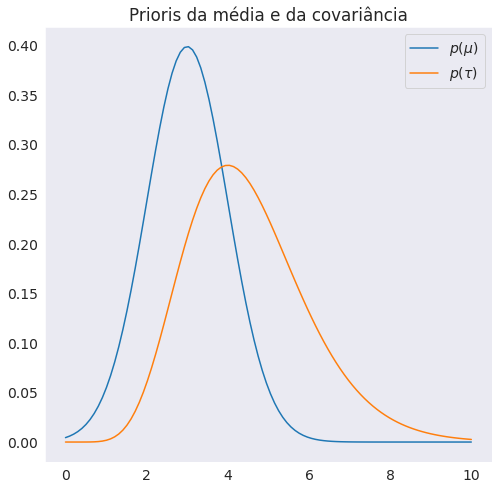

In [ ]:
x = np.linspace(0, 10, 100)

priori_μ = multivariate_normal(μ_0, κ_0**-1)
priori_τ = gamma(a_0, scale=b_0**-1)

plt.plot(x, priori_μ.pdf(x))
plt.plot(x, priori_τ.pdf(x))
plt.title("Prioris da média e da covariância")
plt.legend([
    f'$p(\\mu)$',
    f'$p(\\tau)$'
]);

Realizemos a inferência para os quatro cenários:
$N \in [10, 50, 100, 500]$. O treinamento será feito conforme a ordem de $N$, do menor ao maior. O processo de treinamento ocorrerá enquanto a atualização dos parâmetros  $\kappa$ e $b$ era menor do que $1\cdot 10 ^{-6}$.

In [ ]:
quantidades = [10, 50, 100, 500]

q_μs = []
q_τs = []
historicos = []

for quantidade in quantidades:
    iv = InferenciaVariacional(μ_0, κ_0, a_0, b_0)

    X_treino = X[:quantidade]
    q_μ, q_τ, historico = iv.fit(X_treino, t_maximo=50)

    q_μs.append(q_μ)
    q_τs.append(q_τ)
    historicos.append(historico)

Um sumário dos treinamentos realizados pode ser visto a seguir. São apresentadas as distribuições posterioris e a média das distribuições para cada um dos cenários.

In [ ]:
for i, quantidade in enumerate(quantidades):
    q_μ = q_μs[i]
    q_τ = q_τs[i]
    parametros_finais = historicos[i][-1]

    display(Math(f'''
    \\begin{{aligned}}
    \\text{{Para }} N&={quantidade}\\text{{:}} \\\\
    q_\\mu(\\mu) &= \\mathcal{{N}}(\\mu | \\mu_N, \\kappa_N^{{-1}}) \\\\
                 &= \\mathcal{{N}}(\\mu | {q_μ.mean[0]}, {q_μ.cov[0, 0]}) \\\\
    \\mathrm{{\\mathbb{{E}}}}[q(\\mu)] &= {q_μ.mean[0]} \\\\
    q_\\tau(\\tau) &= \\text{{Ga}}(\\tau | a_N, b_N) \\\\
                   &= \\text{{Ga}}(\\tau | {parametros_finais[2]}, {parametros_finais[3]}) \\\\
    \\mathrm{{\\mathbb{{E}}}}[q(\\tau)] &= {q_τ.mean()} \\\\
    p(\\mu, \\tau) &= q(\\mu, \\tau) \\approx q_\\mu(\\mu) q_\\tau(\\tau) \\\\
    \\\\
    \\end{{aligned}}
    '''))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Gráficos

A seguir encontram-se um conjunto de gráficos envolvendo os experimentos.

#### Gráfico: Valor esperado da posteriori e comparação entre priori e posteriori

Conforme solicitado no trabalho, serão apresentados os gráficos referentes aos valores esperados das posterioris, e as priori e as posterioris.

O código da célula abaixo é responsável por gerar o gráfico que contém a priori, a posteriori e a média da posteriori.
O código está condensado. Caso queira ver, basta clicar no botão `Mostrar Código` abaixo.

In [ ]:
#@title
def plot_priori_posteriori(priori, posteriori, simbolo, titulo, linspace=(0, 6), exibir_media=True, ax=None):
    x = np.linspace(*linspace, 250)
    ax = plt.axes() if ax is None else ax
 
    maximo = posteriori.pdf(x).max()

    ax.plot(x, priori.pdf(x))
    ax.plot(x, posteriori.pdf(x))

    if exibir_media:
        media = posteriori.mean() if callable(posteriori.mean) else posteriori.mean
        ax.vlines(media, 0, maximo+0.2)
    
    ax.legend([
        # f'Priori - $p({simbolo})$',
        # f'Posteriori - $q({simbolo})$',
        # f'Esperança da posteriori - $\\mathrm{{\\mathbb{{E}}}}[q({simbolo})]$',
        f'$p({simbolo})$',
        f'$q({simbolo})$',
        f'$\\mathrm{{\\mathbb{{E}}}}[q({simbolo})]$',
    ], loc='best')

    ax.set_title(titulo)

O código da célula abaixo é responsável por gerar uma única imagem contendo todos os gráficos das priori, das posteriori e das média da posterior para todos os experimentos realizados.
O código está condensado. Caso queira ver, basta clicar no botão `Mostrar Código` abaixo.

In [ ]:
#@title
def plot_priori_posteriori_multiplo(quantidades, priori, posterioris, simbolo, titulo, suptitulo, linspace=(0, 6), exibir_media=True):
    f, axes = plt.subplots(2, 2, squeeze=False, figsize=(12, 12), sharex=True)

    for N, posteriori, ax in zip(quantidades, posterioris, axes.flatten()):
        plot_priori_posteriori(
            priori, posteriori,
            simbolo, titulo(N),
            exibir_media=exibir_media,
            ax=ax
        )
    
    plt.suptitle(suptitulo)

##### Para a distribuição da **média**

A figura abaixo contém as prioris e as posterioris referente a distribuição da média para os quatro experimentos. Nota-se que, a medida que são adicionadas amostras, a certeza (variância) da distribuição posteriri aumenta.

O gráfico também indica a esperança da posteriori (linha preta na vertical).

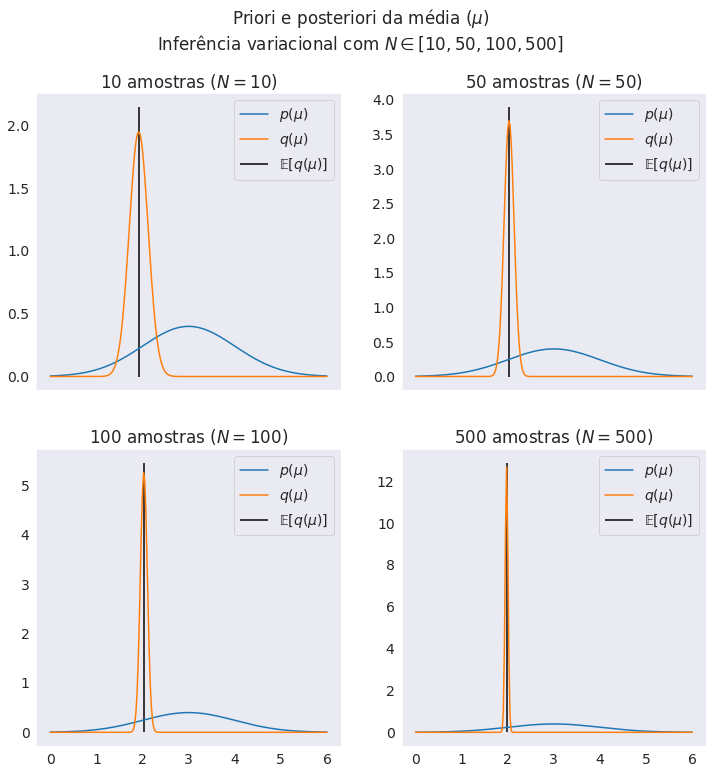

In [ ]:
priori_q_μ = multivariate_normal(μ_0, κ_0**-1)

plot_priori_posteriori_multiplo(
    quantidades,
    priori_q_μ, q_μs, '\mu', lambda N: f'${N}$ amostras ($N={N}$)',
    suptitulo=f'Priori e posteriori da média ($\mu$)\nInferência variacional com $N \in {quantidades}$'
)

##### Para a distribuição da **precisão**

A figura abaixo contém as prioris e as posterioris referente a distribuição da precisão para os quatro experimentos. Nota-se também que, a medida que são adicionadas amostras, a densidade da distribuição posteriri concentra-se mais em um intervalo menor. Entretanto ocorre em uma proporção menor, comparado ao observado na distribuição da média.

O gráfico também indica a esperança da posteriori (linha preta na vertical).

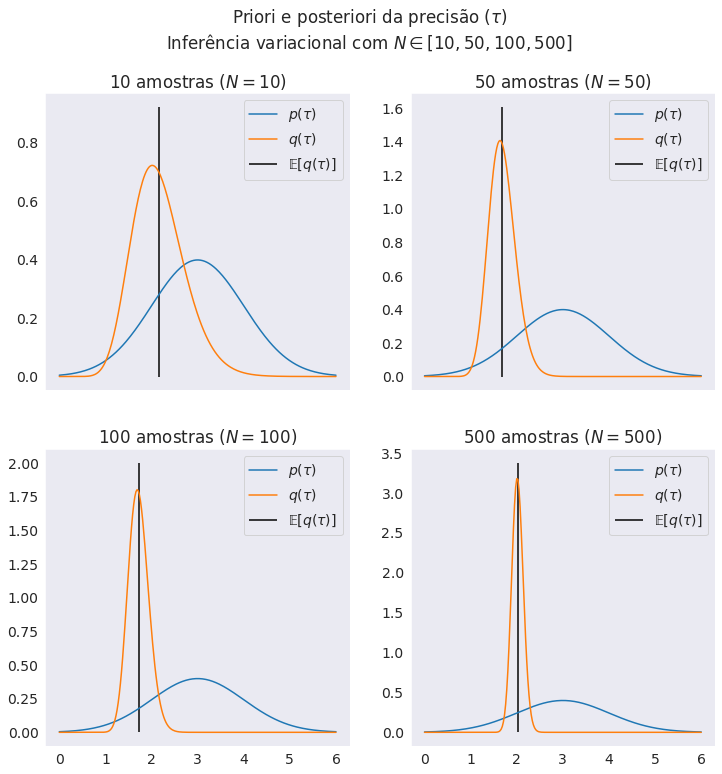

In [ ]:
priori_q_τ = gamma(a_0, scale=b_0**-1)

plot_priori_posteriori_multiplo(
    quantidades,
    priori_q_μ, q_τs, '\\tau', lambda N: f'${N}$ amostras ($N={N}$)',
    suptitulo=f'Priori e posteriori da precisão ($\\tau$)\nInferência variacional com $N \in {quantidades}$'
)

##### Para a gaussiana aproximada

A seguir, podemos ver a priori e a posteriori da Gaussiana aproximada pelo processo inferência variacional. Este gráfico seguinte não foi solicitado no trabalho. Podemos também observar aqui uma maior concentração da distribuição de dados para os experimentos que contiveram uma quantidade maior de amostras.

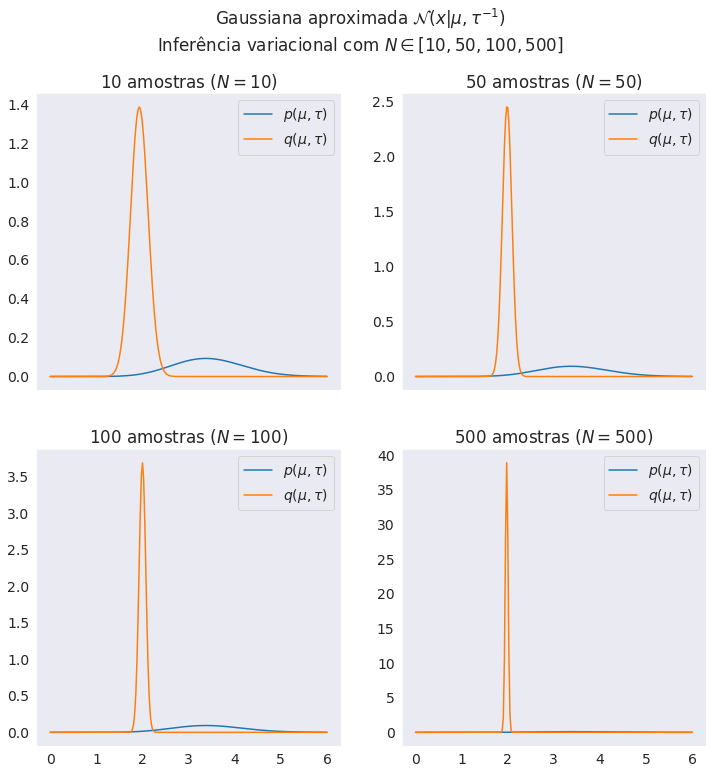

In [ ]:
class DistribuicaoConjunta:
    def __init__(self, distribuicao_1, distribuicao_2):
        self.distribuicao_1 = distribuicao_1
        self.distribuicao_2 = distribuicao_2
    
    def pdf(self, x):
        return self.distribuicao_1.pdf(x) * self.distribuicao_2.pdf(x)


priori_gaussiana = DistribuicaoConjunta(priori_q_μ, priori_q_τ)
posterioris_gaussiana = [
    DistribuicaoConjunta(
        posteriori_q_μ,
        posteriori_q_τ
    )
    for posteriori_q_μ, posteriori_q_τ in zip(q_μs, q_τs)
]


plot_priori_posteriori_multiplo(
    quantidades,
    priori_gaussiana,
    posterioris_gaussiana,
    '\\mu, \\tau', lambda N: f'${N}$ amostras ($N={N}$)',
    suptitulo=f'Gaussiana aproximada $\\mathcal{{N}}(x|\\mu,\\tau^{{-1}})$\nInferência variacional com $N \in {quantidades}$',
    exibir_media=False
)

##### **Animação: Gaussiana estimada ao longo do treinamento**

A seguir, é apresentada animações o comportamento da posteriori ao longo do tempo durante o treinamento.

O código responsável por gerar a animação está condensado. Caso queira ver, basta clicar no botão `Mostrar Código` abaixo.

In [ ]:
#@title
# Referência: https://colab.research.google.com/drive/1lnl5UPFWVPrryaZZgEzd0theI6S94c3X#scrollTo=QLRBwgFqdr83
from matplotlib import animation, rc
from IPython.display import HTML


def plot_animacao(historico, titulo, xlim=(0, 6), ylim=(0, 3)):
    fig, ax = plt.subplots()
    plt.close()

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    x = np.linspace(*xlim, 600)
    line, = ax.plot([], [], lw=2)

    def init():
        line.set_data([], [])
        return (line,)

    def animate(i):
        μ, σ_square, a, b = historico[i]

        q_μ = multivariate_normal(μ, σ_square)
        q_τ = gamma(a, scale=1/b)

        line.set_data(x, q_μ.pdf(x)*q_τ.pdf(x))
        ax.set_title(f'{titulo}\nIteração {i}')

        return (line,)

    anim = animation.FuncAnimation(
        fig,
        animate,
        init_func=init,
        frames=len(historico),
        interval=500,
        #blit=True
    )

    # Note: below is the part which makes it work on Colab
    rc('animation', html='jshtml')
    return anim

###### **Para $N=10$**

A animação corresponde para o caso do treinamento com $N=10$. Experimente pressionar os botões abaixo da imagem.

In [ ]:
i = 0
plot_animacao(historicos[i], f"Gaussiana aproximada ao longo do processo de inferência\nN={quantidades[i]}")

###### **Para $N=500$**

A animação corresponde para o caso do treinamento com $N=500$. Experimente pressionar os botões abaixo da imagem.

In [ ]:
i = 3
plot_animacao(historicos[i], f"Gaussiana aproximada ao longo do processo de inferência\nN={quantidades[i]}", ylim=(0, 70))

#### Gráfico: Posteriori dos parâmetros em $\mathcal{N}(x|\mu, \tau^{-1})$

A seguir serão apresentadas as posterioris dos parâmetos da gaussiana aproximada pelo processo de inferência variacional. Este gráfico não foi solicitado no trabalho

O código da célula abaixo é responsável por gerar o gráfico para um trenamento em particular.
O código está condensado. Caso queira ver, basta clicar no botão `Mostrar Código` abaixo.

In [ ]:
#@title
def plot_posteriori_dos_parametros(modelo, ax=None, titulo="", exibir_nuvem=True, regiao=(0, 4.0)):
    resolucao = 100

    x1 = np.linspace(*regiao, resolucao)
    x2 = np.linspace(*regiao, resolucao)
    X_grid = np.dstack(np.meshgrid(x1, x2))

    nuvem = np.zeros((resolucao, resolucao))
    for i, X in enumerate(X_grid):
        nuvem[i] = modelo.pdf(X)

    ax = plt.axes() if ax is None else ax
    cmap = sns.color_palette("Blues", as_cmap=True)
    if exibir_nuvem:
        ax.contourf(x1, x2, nuvem, levels=100)

    ax.contour(x1, x2, nuvem, levels=8, colors='gray')

    ax.set_xlabel('$\\mu$')
    ax.set_ylabel('$\\tau$')
    ax.set_title(titulo)

O código da célula abaixo é responsável por gerar o gráfico com todos os treinamentos.
O código está condensado. Caso queira ver, basta clicar no botão `Mostrar Código` abaixo.

In [ ]:
#@title
class DistribuicaoConjunta2:
    """
    Utilitário para simplificar o plot do gráfico de contorno
    """
    def __init__(self, distribuicao_1, distribuicao_2):
        self.distribuicao_1 = distribuicao_1
        self.distribuicao_2 = distribuicao_2
    
    def pdf(self, X):
        return self.distribuicao_1.pdf(X[:, 0]) * self.distribuicao_2.pdf(X[:, 1])

def plot_posteriori_dos_parametros_multiplo(quantidades, q_μs, q_τs):
    f, axes = plt.subplots(2, 2, squeeze=False, figsize=(12, 12), sharex=True, sharey=True)

    for N, posteriori_q_μ, posteriori_q_τ, ax in zip(quantidades, q_μs, q_τs, axes.flatten()):
        DistribuicaoConjunta2(posteriori_q_μ, posteriori_q_τ)

        plot_posteriori_dos_parametros(
            DistribuicaoConjunta2(posteriori_q_μ, posteriori_q_τ),
            titulo=f"Posterioris dos parâmetros em $\\mathcal{{N}}(x|\\mu,\\tau^{{-1}})$\nN={N}",
            ax=ax
        )

Finalmente, a visualização para as posterioris:

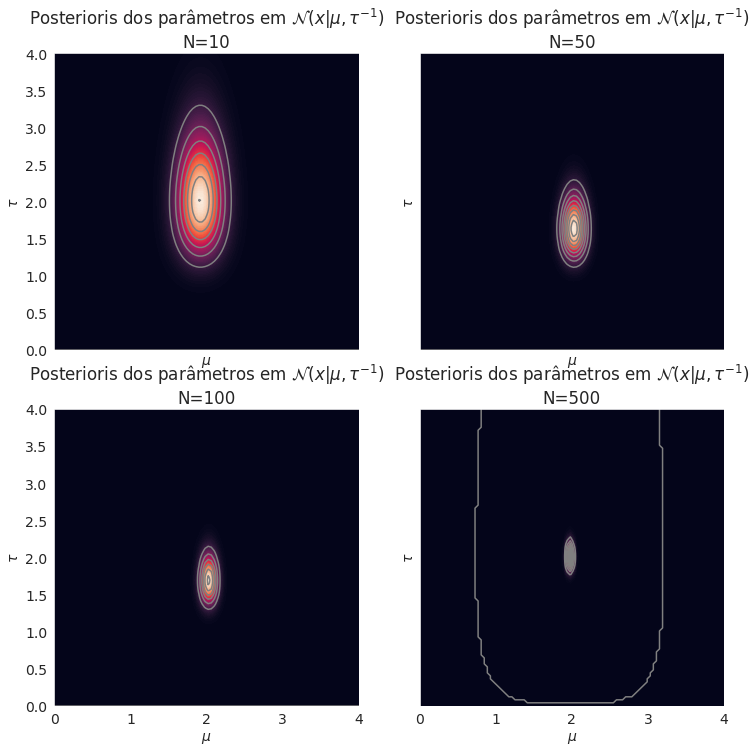

In [ ]:
plot_posteriori_dos_parametros_multiplo(quantidades, q_μs, q_τs)

##### Animação: Posteriori dos parâmetros em $\mathcal{N}(x|\mu, \tau^{-1})$ ao longo do treinamento

Por fim, um último gráfico, também não solicitado, em que apresenta a posteriori dos parâmetros em $\mathcal{N}(x|\mu, \tau^{-1})$ ao longo do treinamento. Ainda, é possível ver no eixo $x$ a posteriori da distribuição referente a média ($\mu$) e no eixo $y$ a posteriori da distribuição referente a precisão ($\tau$).

O código responsável por gerar a animação está condensado. Caso queira ver, basta clicar no botão `Mostrar Código` abaixo.

In [ ]:
#@title
# Baseado em: https://brushingupscience.com/2016/06/21/matplotlib-animations-the-easy-way/
def plot_animacao_2(historico, titulo, resolucao=400, xlim=(0, 6), ylim=(0, 8), leveis=8):
    fig, ax = plt.subplots()
    plt.close()

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    x = np.linspace(*xlim, resolucao)
    y = np.linspace(*ylim, resolucao)

    x1 = np.linspace(*xlim, resolucao)
    x2 = np.linspace(*ylim, resolucao)
    X_grid = np.dstack(np.meshgrid(x1, x2))

    line1, = ax.plot([], [], lw=2)
    line2, = ax.plot([], [], lw=2)
    ax.set_xlabel('$\\mu$')
    ax.set_ylabel('$\\tau$')

    def init():
        line.set_data([], [])
        return (line, contornos)

    def animate(i):
        ax.set_title(f'{titulo}\nIteração {i}')

        μ, σ_square, a, b = historico[i]

        q_μ = multivariate_normal(μ, σ_square)
        q_τ = gamma(a, scale=1/b)

        modelo = DistribuicaoConjunta2(q_μ, q_τ)

        nuvem = np.zeros((resolucao, resolucao))
        for j, X in enumerate(X_grid):
            nuvem[j] = modelo.pdf(X)

        # Remover contornos antigos
        ax.collections = []
        # Colocar contornos novos
        contorno = ax.contour(x1, x2, nuvem, levels=leveis, colors='gray')

        line1.set_data(x, q_μ.pdf(x))
        line2.set_data(q_τ.pdf(y), y)

        return (line1, line2, contorno)

    anim = animation.FuncAnimation(
        fig,
        animate,
        #init_func=init,
        frames=len(historico),
        interval=500,
        #blit=True
    )

    # Note: below is the part which makes it work on Colab
    rc('animation', html='jshtml')
    return anim

###### **Para $N=10$**

A animação corresponde para o caso do treinamento com $N=10$. Experimente pressionar os botões abaixo da imagem.

In [ ]:
i = 0
plot_animacao_2(historicos[i], titulo=f"Posteriori dos parâmetros em $\mathcal{{N}}(x|\mu, \tau^{{-1}})$\nao longo do treinamento para $N={quantidades[i]}$")

###### **Para $N=500$**

A animação corresponde para o caso do treinamento com $N=500$. Experimente pressionar os botões abaixo da imagem.

In [ ]:
i = 3
plot_animacao_2(historicos[i], titulo=f"Posteriori dos parâmetros em $\mathcal{{N}}(x|\mu, \tau^{{-1}})$\nao longo do treinamento para $N={quantidades[i]}$")